# Machine Learning & Statistics Project 2019

Peter McGowan
G00190832

## Introduction
This jupyter notebook contains an investigation of the Boston House Prices dataset for the "Machine-Learnign and Statistics" Module on the GMIT HDip in Data Analytics.

## Background
***Add background info here***

## Starting Off
First we will import the required python libraries.

In [1]:
# Import pandas for managing data
# Import scipy.stats for statistical analysis

# Import matplotlib.pyplot and seaborn for visualisations
import pandas as pd
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
import matplotlib.pyplot as plt
import seaborn as sns

scikit-learn conveniently provides the Boston House Prices dataset - we will now load it.

** change this to import from keras?

In [2]:
# Load the boston dataset from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

Check the keys of the dataset #Research this

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


The pandas library includes a versatile "dataframe" object - an indexed array that helps with managing multi-dimensional data.

In [4]:
# Create a dataframe from the boston house prices dataset
df = pd.DataFrame(boston.data, columns=boston.feature_names)

## Describe

### Checks & Descriptive Statistics

We'll have a look at the head and tail of the data first of all to check for any obvious issues

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


We shoud check also for missing values:

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

All seems to be in order so far.

What do the column headers mean? We can use the following command to dive into it:

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The MEDV column wasn't included in the earlier outputs.
This is because scikit-learn assumes that you wish to use it as the 'target' of the dataset.
We can check that its included:

In [9]:
print(boston.target.shape)

(506,)


This matches the output of the DESCR command so it should be ok.
Now we need to add it as a column to the dataframe to make our lives a bit easier later on.

In [10]:
df['MEDV'] = boston.target

Now output the summary statistics of the dataframe to see how it looks:

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The data seems to have imported correctly and we now have it in a format that we can work with.

### Visualisations
Now we can start creating plots.
Firstly, the distribution of the Median House Value:

Text(0.5, 1.0, 'Distribution of Median House Value')

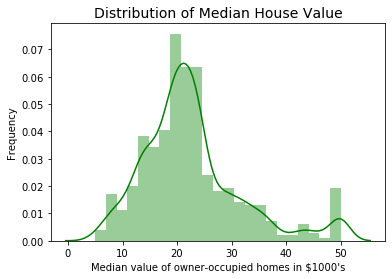

In [12]:
sns.distplot(df['MEDV'], color='g')
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value', fontsize=14)

We can also look at the number of rooms per dwelling like this.

Text(0.5, 1.0, 'Distribution of Rooms')

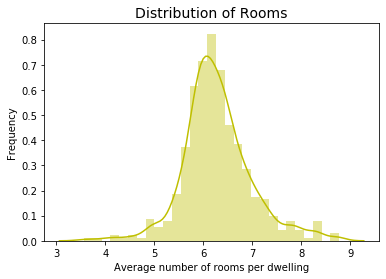

In [13]:
sns.distplot(df['RM'], color='y')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Frequency')
plt.title('Distribution of Rooms', fontsize=14)

What about the relationships between some of the statistics and the median house value?
Firstly we look at DIS:

Text(0.5, 1.0, 'MEDV vs DIS')

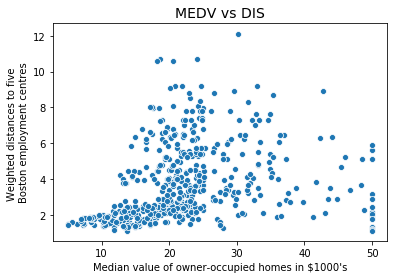

In [14]:
sns.scatterplot(x='MEDV', y='DIS', data=df)
plt.xlabel('Median value of owner-occupied homes in $1000\'s')

plt.ylabel('Weighted distances to five \nBoston employment centres')
plt.title('MEDV vs DIS', fontsize=14)

It is difficult to tell if a definite linear relationship exists between these variables, but an unusual vertical line of values on the MEDV=50 line stand out somewhat.

We can look at RAD also:

Text(0.5, 1.0, 'MEDV vs RM')

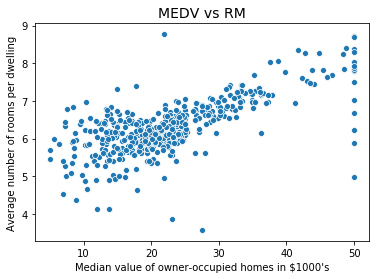

In [15]:
sns.scatterplot(x='MEDV', y='RM', data=df)
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('Average number of rooms per dwelling')
plt.title('MEDV vs RM', fontsize=14)

The linear relationship is much more apparent here - however the clustering of points on the MEDV=50 mark is even more apparent in this plot. This will require further investigation. 

Text(0.5, 1.0, 'MEDV vs RAD')

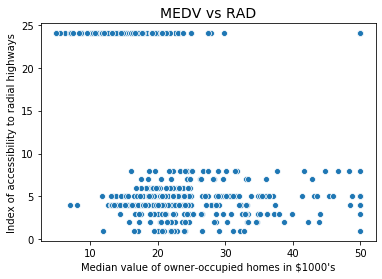

In [16]:
sns.scatterplot(x='MEDV', y='RAD', data=df)
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('Index of accessibility to radial highways')
plt.title('MEDV vs RAD', fontsize=14)

This is quite a bit different to the other plots - the RAD value refers to "index of accessibility to major highways" - it appears that there is a broad range of houses values that have an accessibility rating between 0 and 10, then a very large gap, with a range of houses in the low- to medium price range (with a single high price outlier) with a much higher index of around 24.

Next, we can use a box and whisker plot to look at some of the descriptive statistics of the variables.

Text(0.5, 1, 'Box and Whisker Plots for Each Variable')

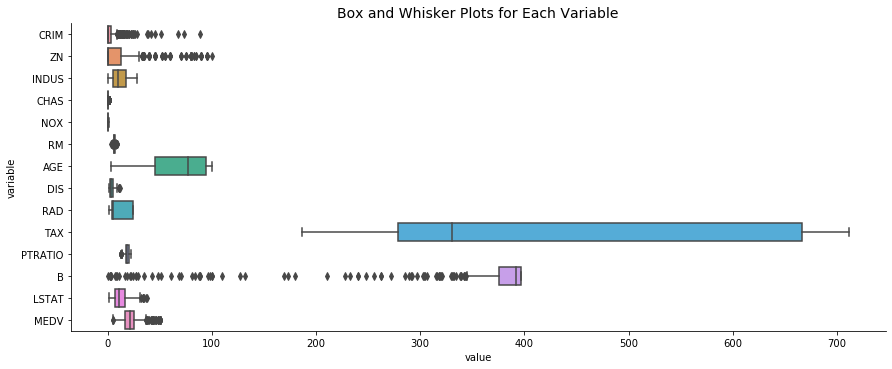

In [17]:
g = sns.catplot(x='value', y='variable', data=pd.melt(df), kind='box', height=5, aspect=2.5);
plt.title('Box and Whisker Plots for Each Variable', fontsize=14)

Clearly, they all have very distinctive characteristics - but we already have most of this information in numerical format. What this really tells us is that certain (most) variables have a good number of outliers - this will be a consideration in development of our neural network later.

## Infer

Text(0.5, 1.0, 'MEDV vs CHAS')

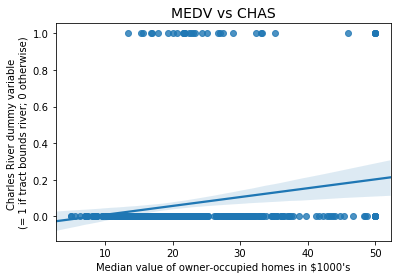

In [18]:
sns.regplot(x='MEDV', y='CHAS', data=df)
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('Charles River dummy variable \n(= 1 if tract bounds river; 0 otherwise)')
plt.title('MEDV vs CHAS', fontsize=14)

*** Add a violin plot?? ***

Text(0.5, 1, 'CHAS vs MEDV')

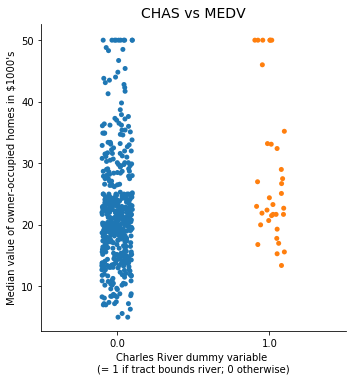

In [19]:
sns.catplot(x='CHAS', y='MEDV',  data=df)
plt.xlabel('Charles River dummy variable \n(= 1 if tract bounds river; 0 otherwise)')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.title('CHAS vs MEDV', fontsize=14)

Now lets visualise the distribution of this using histograms with KDEs overlaid on the same plot:

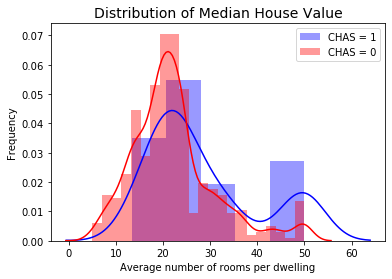

In [20]:
# Extract subsets of the dataframe for houses on the Charles River (ry) vs houses not on it (rn)
ry = df.loc[df['CHAS'] == 1]
rn = df.loc[df['CHAS'] == 0]

# Overlay a distplot for each on the same plot for comparison
sns.distplot(ry['MEDV'], color='b', label = "CHAS = 1")
sns.distplot(rn['MEDV'], color='r', label = "CHAS = 0")

plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value', fontsize=14)
plt.legend()

Although the histograms of the two data sets look quite different, the shapes of the kernal density estimate plots are not dissimilar - although it can be said with reasonable confidence that the values of houses on the Charles River appear to be generally higher than those not on it. We will have to confirm this now by carrying out statistical tests using scipy.

### T-Test

We can carry out a t-test using scipy.stats to check if there is a significant difference in median house prices between those along the Charles River and those that are not. We need to use an independent t-test.

*** should confirm that the t-test assumptions are met?

The null hypothesis here is that the means are equal. Therefore if there is no significant difference between the means, the t-statistic should be close to 0.

First we need MEDV split into two separate sets - one where CHAS=0 and one where CHAS=1. This has already been carried out to generate the histograms above:
* rn = dataframe containing only data on houses not along the Charles River
* ry = dataframe containing only data on houses along the Charles River

In [21]:
ss.ttest_ind(rn['MEDV'], ry['MEDV'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Results:
* t-Statistic: -3.996
* p-value: 7.391e<sup>-5</sup>

We can also check this by carrying out the t-test using statsmodel instead:

In [22]:
ws.ttest_ind(rn['MEDV'], ry['MEDV'])

(-3.9964374660905095, 7.390623170519883e-05, 504.0)

The results are identical - with the inclusion of the degrees of freedom (504).

#### p-value
We generally accept a p-value of 0.5 as being the lower bound of whether a relationship is significant or not. Our calculated p-value is sinificantly lower than this, we can therefore conclude that there is a significant difference between the means - in other words we reject the null hypothesis and can state that there is a significant difference in median house prices between those on the Charles River and those not on it.

** find reference for the above?

### Conclusions

We can conclude that the difference in the means is statistically significant. However we should caveat this - earlier we noted that an issue with the MEDV values - the distribution of the values indicate that the value above 50 have been truncated for some reason, this would certainly have an effect on the means.

## Predict

We will now use the keras package to create a neural network to predict the median house price based on the datasets other variables.

In [23]:
import keras as kr
import numpy as np

Using TensorFlow backend.


** need to choose variables to predict with - ideally those that correlate with the house price, may be of interest to choose several with varying degrees of correlation

### Choosing Correlated Variables

Text(0.5, 1, 'Heatmap of Correlations between Variables')

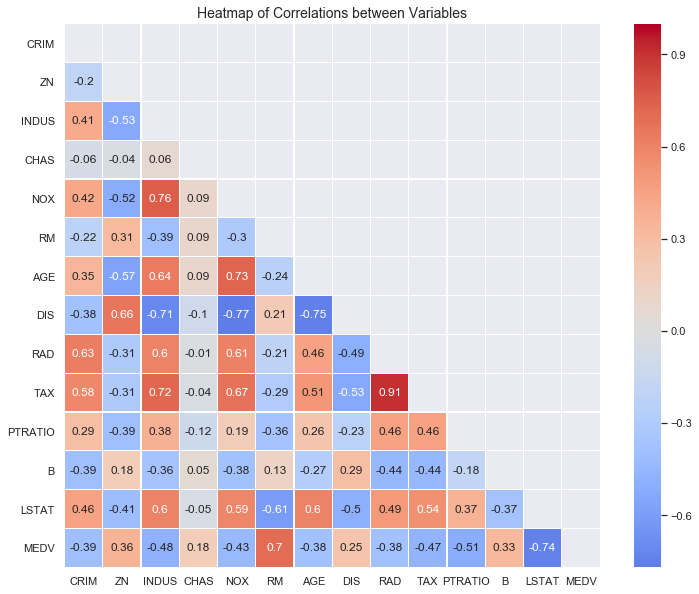

In [24]:
# Seaborn heatmap
sns.set(style='dark')

# Mask upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (12,10))
sns.heatmap(df.corr().round(2), annot=True, mask=mask, cmap='coolwarm', center=0, linewidths=0.2)

plt.title('Heatmap of Correlations between Variables', fontsize=14)

Results: 10 fields most strongly correlated with MEDV are:
* ~~CRIM: -0.39~~
* ~~ZN: 0.36~~
* INDUS: -0.48
* NOX: -0.43
* RM: 0.7
* ~~RAD: -0.38~~
* TAX: -0.47
* PTRATIO: -0.51
* ~~B: 0.33~~
* LSTAT: -0.74
    
We can use these as inputs for the model.

** need to decide on layers, numbers of neurons

In [25]:
inputs = df[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
inputs.describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.136779,0.554695,6.284634,408.237154,18.455534,12.653063
std,6.860353,0.115878,0.702617,168.537116,2.164946,7.141062
min,0.460000,0.385000,3.561000,187.000000,12.600000,1.730000
25%,5.190000,0.449000,5.885500,279.000000,17.400000,6.950000
50%,9.690000,0.538000,6.208500,330.000000,19.050000,11.360000
75%,18.100000,0.624000,6.623500,666.000000,20.200000,16.955000
max,27.740000,0.871000,8.780000,711.000000,22.000000,37.970000


In [26]:
#inputs = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
#inputs.describe()

In [27]:
outputs = df['MEDV']

### Split Dataset

We need to split the dataset into a training dataset and a predictions dataset.

In [28]:
import sklearn.model_selection as mod

In [29]:
# Split the inputs and outputs into training and test sets.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

In [30]:
print(inputs_train.describe())
print(inputs_test.describe())

            INDUS         NOX          RM         TAX     PTRATIO       LSTAT
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000
mean    11.342079    0.558720    6.270045  407.606436   18.444802   12.705099
std      6.921353    0.117297    0.692692  169.781749    2.171790    6.990482
min      0.740000    0.389000    3.561000  187.000000   12.600000    1.730000
25%      5.190000    0.456750    5.876750  277.000000   17.375000    7.200000
50%      9.795000    0.538000    6.185000  330.000000   19.050000   11.645000
75%     18.100000    0.625750    6.608500  666.000000   20.200000   16.910000
max     27.740000    0.871000    8.780000  711.000000   22.000000   37.970000
            INDUS         NOX          RM         TAX     PTRATIO       LSTAT
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000
mean    10.323627    0.538752    6.342422  410.735294   18.498039   12.446961
std      6.583286    0.109173    0.741346  164.310496    2.14771

In [31]:
print(outputs_train.describe())
print(outputs_test.describe())

count    404.000000
mean      22.273515
std        8.768688
min        5.000000
25%       16.775000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64
count    102.000000
mean      23.559804
std       10.714534
min        5.000000
25%       17.575000
50%       20.450000
75%       27.400000
max       50.000000
Name: MEDV, dtype: float64


In [32]:
inputs_test.iloc[0]

INDUS        1.470
NOX          0.403
RM           7.135
TAX        402.000
PTRATIO     17.000
LSTAT        4.450
Name: 200, dtype: float64

### Build Neural Network

#### Preprocessing

*** https://scikit-learn.org/stable/modules/preprocessing.html
*** http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html

Preprocessing can help models to run more accurately and effectively by preparing the data into a more suitable form.

##### Scaling

In [33]:
from sklearn import preprocessing

In [34]:
#inputs_scaled = preprocessing.scaler.fit_transform(inputs_train[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])

In [35]:
scaler = preprocessing.MinMaxScaler()

*** http://benalexkeen.com/feature-scaling-with-scikit-learn/

In [36]:
inputs_train_scaled = pd.DataFrame(scaler.fit_transform(inputs_train), columns=inputs.columns)

In [37]:
inputs_train_scaled.describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.392670,0.352117,0.519073,0.421005,0.621787,0.302845
std,0.256346,0.243354,0.132725,0.324011,0.231042,0.192894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.164815,0.140560,0.443715,0.171756,0.507979,0.150938
50%,0.335370,0.309129,0.502778,0.272901,0.686170,0.273593
75%,0.642963,0.491183,0.583924,0.914122,0.808511,0.418874
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
inputs_test_scaled = pd.DataFrame(scaler.fit_transform(inputs_test), columns=inputs.columns)

In [39]:
inputs_test_scaled.describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.460272,0.316362,0.530036,0.460328,0.685819,0.324006
std,0.307200,0.224636,0.178251,0.347379,0.249734,0.238285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.188871,0.109414,0.443496,0.195560,0.558140,0.143198
50%,0.377975,0.277778,0.511421,0.342495,0.750000,0.257002
75%,0.823145,0.491770,0.604352,1.000000,0.883721,0.467298
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Whitening

In [40]:
#from sklearn.decomposition import PCA
import sklearn.decomposition as dec

In [41]:
pca = dec.PCA(n_components=6, whiten=True)
pca.fit(inputs_train_scaled)
inputs_train_white = pd.DataFrame(pca.transform(inputs_train_scaled), columns=inputs.columns)
inputs_train_white.describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-7.859500e-17,1.918158e-16,2.709604e-16,1.396023e-16,3.072350e-16,-9.288500e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.555477e+00,-2.303694e+00,-2.868656e+00,-3.176449e+00,-2.113294e+00,-2.877554e+00
25%,-8.850322e-01,-6.024559e-01,-6.723994e-01,-6.208729e-01,-8.181301e-01,-5.549301e-01
50%,-2.978230e-01,-1.834983e-01,-6.602553e-02,-9.191103e-03,-1.204650e-01,2.549515e-02
75%,1.095381e+00,1.561204e-01,5.805274e-01,6.066816e-01,6.906388e-01,5.928555e-01
max,2.002386e+00,3.134827e+00,3.689726e+00,3.377018e+00,2.829232e+00,6.055041e+00


In [42]:
pca.fit(inputs_test_scaled)
inputs_test_white = pd.DataFrame(pca.transform(inputs_test_scaled), columns=inputs.columns)
inputs_test_white.describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,-5.646355e-17,4.353816e-16,-4.647698e-16,-4.571507e-16,2.829980e-17,-2.963316e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.699574e+00,-1.749199e+00,-2.532409e+00,-2.233506e+00,-2.831747e+00,-2.505963e+00
25%,-8.130185e-01,-7.333461e-01,-7.045665e-01,-5.458571e-01,-7.015259e-01,-7.802616e-01
50%,-2.488701e-01,-2.221333e-01,-1.592763e-01,-2.442367e-01,-1.535010e-01,3.875642e-02
75%,1.211334e+00,7.179221e-01,6.578802e-01,4.831295e-01,6.616781e-01,7.383843e-01
max,1.741621e+00,3.186021e+00,3.444971e+00,3.343197e+00,2.894642e+00,2.706351e+00


#### Keras

In [43]:
# Create a new neural network.
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

*** https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

There are many different ways to build a neural network, the accuracy will depend on the approach we take.

*** https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/
*** https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
*** https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

##### Defining Functions

It will be useful to create some functions now as some of the following work will be repetitive.

In [44]:
# Function that carries out the keras.evaluate() function and prints to a specified format
def evaluator(evalN, modelN):
    evalN = modelN.evaluate(inputs_test_scaled, outputs_test, verbose=0)
    print('This model evaluates as:')
    print('* Loss:', evalN[0])
    print('* MAE:', evalN[1])
    print('* Accuracy:', evalN[2])

In [45]:
# Function that carries out the keras.predict() function and prints to a specified format
def predictor(predN, modelN):
    predN = modelN.predict(inputs_test_scaled.as_matrix()[0:1])
    print('This model predicts as:')
    print('* Predicted Value:', predN[0][0])
    print('* Actual value:', outputs_test[0:1].iloc[0])

#### First Attempt

This will be a three layer neural network with densities of 100, 50 and 1.

##### Construct Model

In [46]:
model1 = Sequential() 

model1.add(Dense(units=64, activation='relu', input_dim=6))
model1.add(Dense(units=32, activation='relu'))
model1.add(Dense(units=1))

model1.compile(loss='mse', optimizer='adam', metrics=['mae', 'acc'])

model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


*** https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

In [47]:
earlystop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=False)

In [48]:
history1 = model1.fit(inputs_train_scaled, outputs_train, epochs=500, validation_data=(inputs_test_scaled, outputs_test), callbacks=[earlystop])

Instructions for updating:
Use tf.cast instead.
Train on 404 samples, validate on 102 samples
Epoch 1/500
404/404 [==============================] - 0s 309us/step - loss: 570.8296 - mae: 22.2315 - acc: 0.0000e+00 - val_loss: 659.1202 - val_mae: 23.3468 - val_acc: 0.0000e+00
Epoch 2/500
404/404 [==============================] - 0s 39us/step - loss: 559.2688 - mae: 21.9506 - acc: 0.0000e+00 - val_loss: 646.1558 - val_mae: 23.0445 - val_acc: 0.0000e+00
Epoch 3/500
404/404 [==============================] - 0s 42us/step - loss: 545.7009 - mae: 21.6250 - acc: 0.0000e+00 - val_loss: 627.9450 - val_mae: 22.6176 - val_acc: 0.0000e+00
Epoch 4/500
404/404 [==============================] - 0s 39us/step - loss: 524.7030 - mae: 21.1087 - acc: 0.0000e+00 - val_loss: 598.0188 - val_mae: 21.8899 - val_acc: 0.0000e+00
Epoch 5/500
404/404 [==============================] - 0s 39us/step - loss: 490.4235 - mae: 20.2248 - acc: 0.0000e+00 - val_loss: 551.0268 - val_mae: 20.6829 - val_acc: 0.0000e+00
Epoch

In [49]:
evaluate1 = []
evaluator(evaluate1, model1)

This model evaluates as:
* Loss: 14.9855110318053
* MAE: 2.8635849952697754
* Accuracy: 0.03921568766236305


In [50]:
predict1 = []
predictor(predict1, model1)

This model predicts as:
* Predicted Value: 31.381084
* Actual value: 32.9


C:\Users\Peter McGowan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##### Results

Our basic, three layer model run with the data as-is didn't perform particularly well, although it was converging towards a solution. Normalising the data definitely made a significant improvement. We can now move on to developing the structure of the model itself to improve the accuracy.

#### Second Attempt - Deepen

We will develop the second attempt model and deepen it now by adding another hidden layer.

##### Construct Model

In [51]:
model2 = Sequential() 

model2.add(Dense(units=128, activation='relu', input_dim=6))
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=1))

model2.compile(loss='mse', optimizer='adam', metrics=['mae', 'acc'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________


##### Training

In [52]:
history2 = model2.fit(inputs_train_scaled, outputs_train, epochs=500, validation_data=(inputs_test_scaled, outputs_test), callbacks=[earlystop])

Train on 404 samples, validate on 102 samples
Epoch 1/500
404/404 [==============================] - 0s 348us/step - loss: 560.6211 - mae: 21.9723 - acc: 0.0000e+00 - val_loss: 633.5348 - val_mae: 22.7259 - val_acc: 0.0000e+00
Epoch 2/500
404/404 [==============================] - 0s 39us/step - loss: 514.3693 - mae: 20.8047 - acc: 0.0000e+00 - val_loss: 558.1933 - val_mae: 20.8403 - val_acc: 0.0000e+00
Epoch 3/500
404/404 [==============================] - 0s 39us/step - loss: 415.0602 - mae: 18.0431 - acc: 0.0050 - val_loss: 406.1202 - val_mae: 16.5411 - val_acc: 0.0000e+00
Epoch 4/500
404/404 [==============================] - 0s 39us/step - loss: 250.9220 - mae: 12.9954 - acc: 0.0000e+00 - val_loss: 232.5624 - val_mae: 12.1426 - val_acc: 0.0000e+00
Epoch 5/500
404/404 [==============================] - 0s 39us/step - loss: 147.8694 - mae: 9.5399 - acc: 0.0025 - val_loss: 205.1323 - val_mae: 11.5262 - val_acc: 0.0000e+00
Epoch 6/500
404/404 [==============================] - 0s 39us

This is a noticeable improvement over the first model. It is converging more quickly, but perhaps we should increase the number of epochs to assess its accuracy.

In [53]:
evaluate2 = []
evaluator(evaluate2, model2)

This model evaluates as:
* Loss: 13.133581404592476
* MAE: 2.782153606414795
* Accuracy: 0.009803921915590763


In [54]:
predict2 = []
predictor(predict2, model2)

This model predicts as:
* Predicted Value: 31.187153
* Actual value: 32.9


C:\Users\Peter McGowan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##### Results

Deepening the model by adding another hidden layer has helped to increase the accuracy - therefore we can be reasonably confident that deeping the model is effective. 

#### Third Attempt - Widen

We will develop the model more and widen it now by doubling the number of units in each hidden layer.

##### Construct Model

In [55]:
model3 = Sequential() 

model3.add(Dense(units=256, activation='relu', input_dim=6))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=1))

model3.compile(loss='mse', optimizer='adam', metrics=['mae', 'acc'])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               1792      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 43,009
Trainable params: 43,009
Non-trainable params: 0
_________________________________________________________________


##### Training

In [56]:
history3 = model3.fit(inputs_train_scaled, outputs_train, epochs=500, validation_data=(inputs_test_scaled, outputs_test), callbacks=[earlystop])

Train on 404 samples, validate on 102 samples
Epoch 1/500
404/404 [==============================] - 0s 387us/step - loss: 550.2243 - mae: 21.7251 - acc: 0.0000e+00 - val_loss: 604.1099 - val_mae: 22.0166 - val_acc: 0.0000e+00
Epoch 2/500
404/404 [==============================] - 0s 39us/step - loss: 460.6515 - mae: 19.3400 - acc: 0.0025 - val_loss: 444.0732 - val_mae: 17.6494 - val_acc: 0.0000e+00
Epoch 3/500
404/404 [==============================] - 0s 39us/step - loss: 267.9179 - mae: 13.3241 - acc: 0.0025 - val_loss: 226.4274 - val_mae: 12.0858 - val_acc: 0.0000e+00
Epoch 4/500
404/404 [==============================] - 0s 39us/step - loss: 151.7035 - mae: 9.7588 - acc: 0.0074 - val_loss: 196.8486 - val_mae: 11.2366 - val_acc: 0.0000e+00
Epoch 5/500
404/404 [==============================] - 0s 39us/step - loss: 116.7088 - mae: 8.3352 - acc: 0.0000e+00 - val_loss: 145.9546 - val_mae: 9.3047 - val_acc: 0.0098
Epoch 6/500
404/404 [==============================] - 0s 39us/step - lo

In [57]:
evaluate3 = []
evaluator(evaluate3, model3)

This model evaluates as:
* Loss: 13.09696756624708
* MAE: 2.749974489212036
* Accuracy: 0.009803921915590763


In [58]:
predict3 = []
predictor(predict3, model3)

This model predicts as:
* Predicted Value: 30.298113
* Actual value: 32.9


C:\Users\Peter McGowan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##### Results

More accurate than all previous attempts:
* Loss (Mean Squared Error): ~8
* Mean Absolute Error: ~2.0
* Accuracy: 0.0272

##### Next Section

In [59]:
print(history1.history.keys())

dict_keys(['val_loss', 'val_mae', 'val_acc', 'loss', 'mae', 'acc'])


In [60]:
print(model1.evaluate(inputs_test_scaled, outputs_test))
print(model2.evaluate(inputs_test_scaled, outputs_test))
print(model3.evaluate(inputs_test_scaled, outputs_test))

102/102 [==============================] - 0s 0us/step
[14.9855110318053, 2.8635849952697754, 0.03921568766236305]
102/102 [==============================] - 0s 0us/step
[13.133581404592476, 2.782153606414795, 0.009803921915590763]
102/102 [==============================] - 0s 153us/step
[13.09696756624708, 2.749974489212036, 0.009803921915590763]


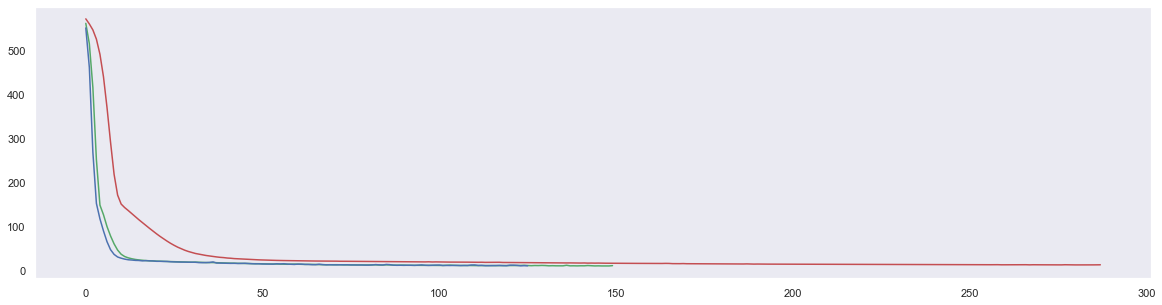

In [61]:
plt.figure(figsize=(20,5))
plt.plot(history1.history['loss'], color='r')
plt.plot(history2.history['loss'], color='g')
plt.plot(history3.history['loss'], color='b')

*** adjust the below to output what i want

*** https://keras.io/visualization/

*** https://www.tensorflow.org/guide/keras/train_and_evaluate
*** https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network